# Friendships within a Distributed Group (2019)

## Packages & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pagerank import powerIteration

## Importing Data

### How well do you know this person?

In [2]:
data_2019_know = pd.read_csv("data/2019_know.csv", index_col=0)
data_2019_know

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,4.0,4.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,3.0,2.0
Emma,2.0,NaN,3.0,2.0,2.0,3.0,3.0,1.0,2.0,3.0,1.0,3.0,1.0,5.0
Gabby,3.0,3.0,NaN,5.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0
Cam,4.0,3.0,5.0,NaN,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,5.0
Andrew,3.0,3.0,3.0,5.0,NaN,5.0,2.0,2.0,4.0,4.0,3.0,4.0,3.0,5.0
Isaac,2.0,2.0,5.0,5.0,5.0,NaN,2.0,1.0,4.0,4.0,1.0,2.0,1.0,5.0
Alex,3.0,4.0,5.0,5.0,2.0,3.0,NaN,5.0,2.0,2.0,2.0,3.0,3.0,3.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,NaN,4.0,3.0,4.0,3.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How much do you like this person?

In [3]:
data_2019_like = pd.read_csv("data/2019_like.csv", index_col=0)
data_2019_like

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,4.0,5.0,2.0,2.0,2.0,4.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0
Emma,4.0,NaN,3.0,3.0,3.0,3.0,5.0,4.0,3.0,4.0,3.0,5.0,3.0,5.0
Gabby,5.0,5.0,NaN,5.0,5.0,4.0,5.0,4.0,3.0,5.0,4.0,3.0,5.0,2.0
Cam,4.0,4.0,5.0,NaN,4.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,3.0
Andrew,3.0,3.0,3.0,5.0,NaN,5.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0
Isaac,3.0,4.0,5.0,5.0,5.0,NaN,3.0,2.0,4.0,5.0,2.0,1.0,3.0,5.0
Alex,4.0,4.0,5.0,5.0,2.0,4.0,NaN,5.0,2.0,3.0,2.0,3.0,3.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,4.0,5.0,3.0,4.0,4.0,4.0,3.0,5.0,NaN,4.0,4.0,4.0,5.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [4]:
data_2019_contact = pd.read_csv("data/2019_contact.csv", index_col=0)
data_2019_contact

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Emma,2.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0
Gabby,1.0,1.0,NaN,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Cam,2.0,1.0,4.0,NaN,3.0,4.0,2.0,2.0,4.0,3.0,2.0,2.0,3.0,1.0
Andrew,1.0,1.0,1.0,3.0,NaN,5.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0
Isaac,1.0,1.0,2.0,5.0,5.0,NaN,1.0,1.0,3.0,2.0,1.0,1.0,1.0,5.0
Alex,1.0,1.0,3.0,2.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,2.0,1.0,2.0,3.0,3.0,3.0,2.0,1.0,NaN,2.0,2.0,2.0,1.0,2.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How much do you trust this person?

In [5]:
data_2019_trust = pd.read_csv("data/2019_trust.csv", index_col=0)
data_2019_trust

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,4.0,4.0,3.0,1.0,1.0,4.0,5.0,2.0,4.0,2.0,4.0,3.0,1.0
Emma,2.0,NaN,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,5.0
Gabby,3.0,3.0,NaN,5.0,3.0,4.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0
Cam,3.0,2.0,5.0,NaN,3.0,3.0,2.0,5.0,4.0,4.0,2.0,2.0,4.0,2.0
Andrew,3.0,3.0,3.0,4.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0
Isaac,3.0,4.0,5.0,5.0,5.0,NaN,3.0,2.0,4.0,4.0,1.0,1.0,1.0,5.0
Alex,3.0,4.0,5.0,3.0,1.0,2.0,NaN,5.0,1.0,1.0,1.0,2.0,3.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,3.0,5.0,3.0,3.0,4.0,3.0,4.0,5.0,NaN,4.0,3.0,4.0,4.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How likely are you to go to this person for advice or emotional support?

In [6]:
data_2019_support = pd.read_csv("data/2019_support.csv", index_col=0)
data_2019_support

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Emma,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0
Gabby,2.0,2.0,NaN,5.0,1.0,3.0,5.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0
Cam,3.0,1.0,5.0,NaN,3.0,4.0,1.0,5.0,3.0,4.0,2.0,1.0,3.0,1.0
Andrew,1.0,1.0,1.0,2.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
Isaac,1.0,1.0,3.0,5.0,5.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0
Alex,3.0,3.0,5.0,3.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### General Data / Demographics

In [7]:
data_2019_demographics = pd.read_csv("data/2019_demographics.csv", index_col=0)
data_2019_demographics

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289.0,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322.0,"Theater Studies Major, Film Studies Minor",Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,Boston University,2215.0,Business Administration,Orange Cranberry
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984.0,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187.0,Biology,Chocolate Chip
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623.0,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213.0,Electrical Engineering,Peanut Butter Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064.0,Theology,Molasses Ginger
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467.0,Theology and Applied Psychology/Human Development,Snickerdoodle


In [8]:
people = list(data_2019_demographics.sort_values(by=['lname']).index)
people

['Steph',
 'Emma',
 'Gabby',
 'Cam',
 'Andrew',
 'Isaac',
 'Alex',
 'Arielle',
 'Liam',
 'James',
 'Drew',
 'Ruben',
 'Ziqian',
 'Michelle']

In [9]:
data_2019_demographics_men = data_2019_demographics[data_2019_demographics['gender']=='Male']
data_2019_demographics_men

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623.0,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213.0,Electrical Engineering,Peanut Butter Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064.0,Theology,Molasses Ginger
Andrew,Jeon,Male,Asian;White,Northfield,MN,St. Olaf College,55057.0,Computer Science; Economics,Milano
Drew,Pelusi,Male,White,Boston,MA,Boston University,2215.0,Computer Science,Sugar Cookie
James,Palmer,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ruben,Walter,Male,White,Wheaton,IL,Wheaton College,60187.0,Economics and International Relations,Oatmeal Raisin


In [10]:
data_2019_demographics_women = data_2019_demographics[data_2019_demographics['gender']=='Female']
data_2019_demographics_women

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289.0,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322.0,"Theater Studies Major, Film Studies Minor",Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,Boston University,2215.0,Business Administration,Orange Cranberry
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984.0,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187.0,Biology,Chocolate Chip
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467.0,Theology and Applied Psychology/Human Development,Snickerdoodle
Arielle,Moreira,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
men = list(data_2019_demographics_men.index)
men

['Cam', 'Isaac', 'Liam', 'Andrew', 'Drew', 'James', 'Ruben']

In [12]:
women = list(data_2019_demographics_women.index)
women

['Steph', 'Gabby', 'Ziqian', 'Alex', 'Emma', 'Michelle', 'Arielle']

## Average: The Numbers

### How well do you know this person?

In [13]:
avg_2019_know = data_2019_know.mean()
avg_2019_know.sort_values(ascending=False)

Cam         4.200000
Michelle    4.100000
Isaac       4.000000
Gabby       4.000000
James       3.545455
Ruben       3.300000
Andrew      3.300000
Emma        3.200000
Liam        3.100000
Steph       3.000000
Alex        2.900000
Arielle     2.727273
Ziqian      2.636364
Drew        2.300000
dtype: float64

### How much do you like this person?

In [14]:
avg_2019_like = data_2019_like.mean()
avg_2019_like.sort_values(ascending=False)

Emma        4.200000
James       4.181818
Cam         4.100000
Gabby       4.100000
Arielle     4.090909
Steph       4.000000
Isaac       3.900000
Ziqian      3.818182
Alex        3.800000
Ruben       3.700000
Andrew      3.700000
Liam        3.500000
Michelle    3.400000
Drew        3.400000
dtype: float64

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [15]:
avg_2019_contact = data_2019_contact.mean()
avg_2019_contact.sort_values(ascending=False)

Isaac       2.600000
Cam         2.500000
Michelle    2.200000
Andrew      2.100000
Gabby       2.100000
James       1.727273
Liam        1.700000
Ruben       1.500000
Emma        1.500000
Steph       1.500000
Arielle     1.454545
Alex        1.400000
Ziqian      1.363636
Drew        1.300000
dtype: float64

### How much do you trust this person?

In [16]:
avg_2019_trust = data_2019_trust.mean()
avg_2019_trust.sort_values(ascending=False)

Gabby       3.800000
Emma        3.800000
James       3.545455
Arielle     3.545455
Cam         3.500000
Alex        3.300000
Isaac       3.200000
Michelle    3.100000
Steph       3.100000
Andrew      2.900000
Ziqian      2.818182
Liam        2.800000
Ruben       2.700000
Drew        2.200000
dtype: float64

### How likely are you to go to this person for advice or emotional support?

In [17]:
avg_2019_support = data_2019_support.mean()
avg_2019_support.sort_values(ascending=False)

Cam         2.500000
Isaac       2.300000
Gabby       2.200000
Michelle    2.000000
James       2.000000
Andrew      2.000000
Arielle     1.909091
Emma        1.900000
Liam        1.500000
Steph       1.500000
Alex        1.400000
Ruben       1.300000
Drew        1.200000
Ziqian      1.181818
dtype: float64

## Average: Basic Analysis

### How well do you know this person?

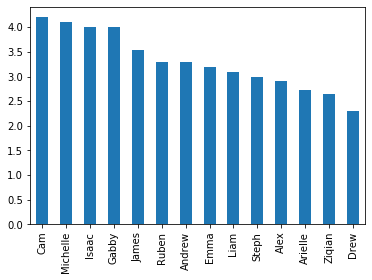

In [18]:
avg_2019_know.sort_values(ascending=False).plot.bar()

In [19]:
avg_2019_know_men = avg_2019_know[avg_2019_know.index.isin(men)==True]
avg_2019_know_men

Cam       4.200000
Andrew    3.300000
Isaac     4.000000
Liam      3.100000
James     3.545455
Drew      2.300000
Ruben     3.300000
dtype: float64

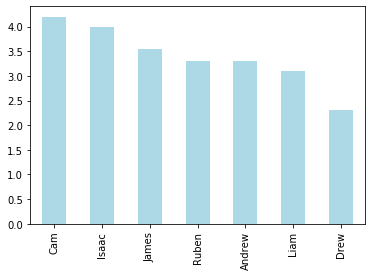

In [20]:
avg_2019_know_men_plot = avg_2019_know_men.sort_values(ascending=False).plot.bar(color="LightBlue")
avg_2019_know_men_plot

In [21]:
avg_2019_know_women = avg_2019_know[avg_2019_know.index.isin(women)==True]
avg_2019_know_women

Steph       3.000000
Emma        3.200000
Gabby       4.000000
Alex        2.900000
Arielle     2.727273
Ziqian      2.636364
Michelle    4.100000
dtype: float64

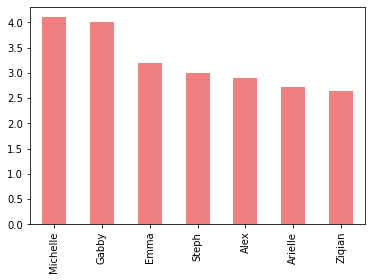

In [22]:
avg_2019_know_women_plot = avg_2019_know_women.sort_values(ascending=False).plot.bar(color="LightCoral")
avg_2019_know_women_plot

In [23]:
avg_2019_know_descending = []
avg_2019_know_men_values = []
avg_2019_know_women_values = []

for person in avg_2019_know.sort_values(ascending=False).index:
    avg_2019_know_descending += [person]
    if person in men:
        avg_2019_know_men_values += [avg_2019_know[person]]
        avg_2019_know_women_values += [0.0]
    elif person in women:
        avg_2019_know_women_values += [avg_2019_know[person]]
        avg_2019_know_men_values += [0.0]

In [24]:
avg_2019_know_men_values

[4.2,
 0.0,
 4.0,
 0.0,
 3.5454545454545454,
 3.3,
 3.3,
 0.0,
 3.1,
 0.0,
 0.0,
 0.0,
 0.0,
 2.3]

In [25]:
avg_2019_know_women_values

[0.0,
 4.1,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 3.2,
 0.0,
 3.0,
 2.9,
 2.727272727272727,
 2.6363636363636362,
 0.0]

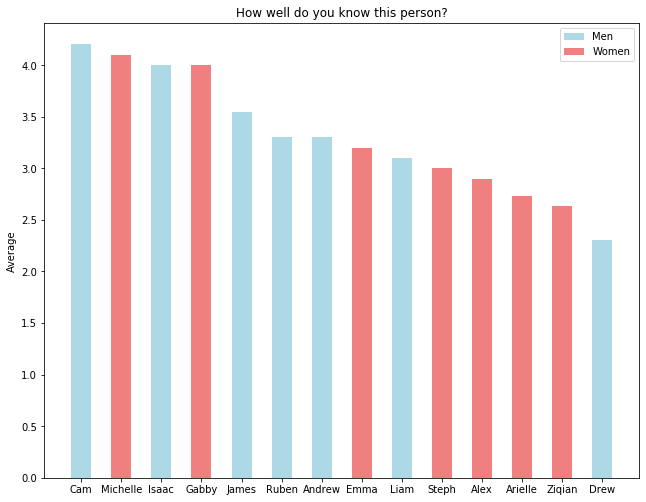

In [26]:
N = len(avg_2019_know_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_know_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_know_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How well do you know this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_know_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you like this person?

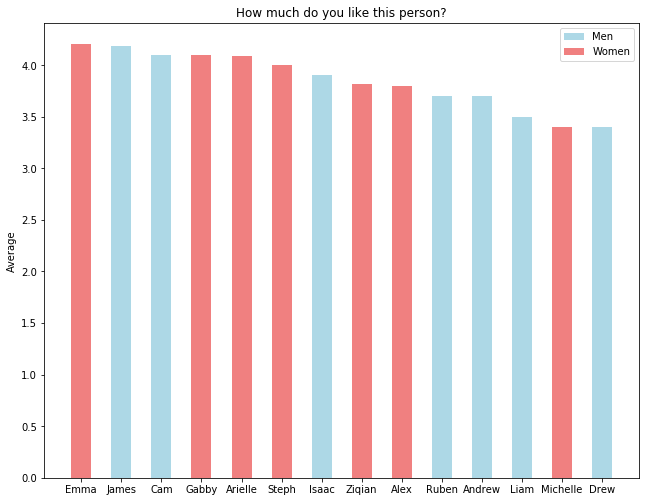

In [27]:
avg_2019_like_descending = []
avg_2019_like_men_values = []
avg_2019_like_women_values = []

for person in avg_2019_like.sort_values(ascending=False).index:
    avg_2019_like_descending += [person]
    if person in men:
        avg_2019_like_men_values += [avg_2019_like[person]]
        avg_2019_like_women_values += [0.0]
    elif person in women:
        avg_2019_like_women_values += [avg_2019_like[person]]
        avg_2019_like_men_values += [0.0]

N = len(avg_2019_like_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_like_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_like_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How much do you like this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_like_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

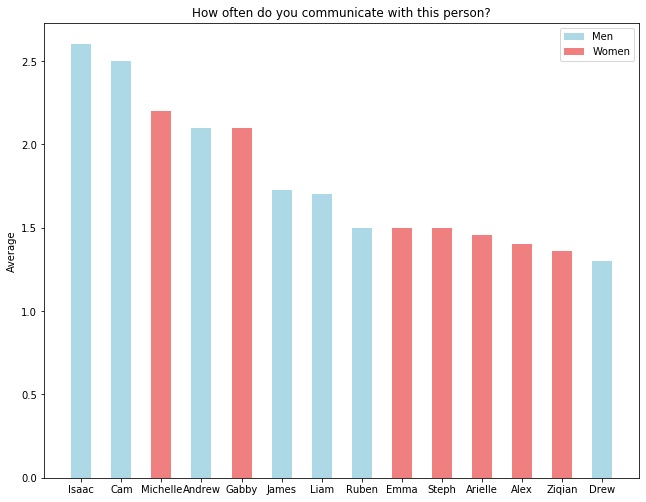

In [28]:
avg_2019_contact_descending = []
avg_2019_contact_men_values = []
avg_2019_contact_women_values = []

for person in avg_2019_contact.sort_values(ascending=False).index:
    avg_2019_contact_descending += [person]
    if person in men:
        avg_2019_contact_men_values += [avg_2019_contact[person]]
        avg_2019_contact_women_values += [0.0]
    elif person in women:
        avg_2019_contact_women_values += [avg_2019_contact[person]]
        avg_2019_contact_men_values += [0.0]

N = len(avg_2019_contact_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_contact_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_contact_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How often do you communicate with this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_contact_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you trust this person?

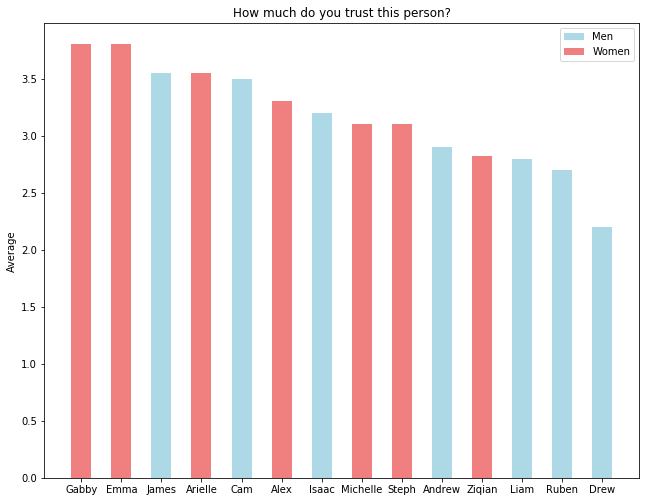

In [29]:
avg_2019_trust_descending = []
avg_2019_trust_men_values = []
avg_2019_trust_women_values = []

for person in avg_2019_trust.sort_values(ascending=False).index:
    avg_2019_trust_descending += [person]
    if person in men:
        avg_2019_trust_men_values += [avg_2019_trust[person]]
        avg_2019_trust_women_values += [0.0]
    elif person in women:
        avg_2019_trust_women_values += [avg_2019_trust[person]]
        avg_2019_trust_men_values += [0.0]

N = len(avg_2019_trust_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_trust_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_trust_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How much do you trust this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_trust_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How likely are you to go to this person for advice or emotional support?

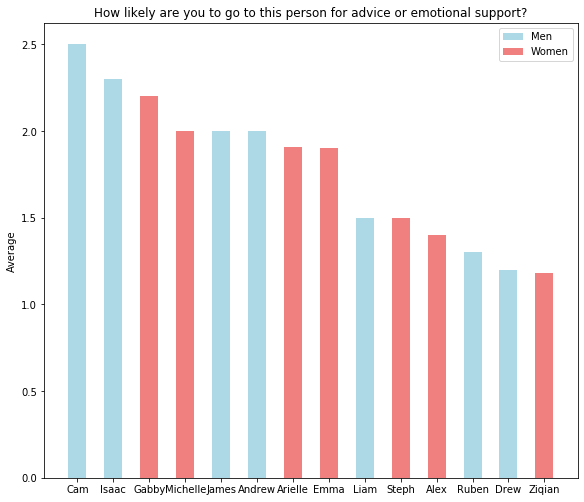

In [30]:
avg_2019_support_descending = []
avg_2019_support_men_values = []
avg_2019_support_women_values = []

for person in avg_2019_support.sort_values(ascending=False).index:
    avg_2019_support_descending += [person]
    if person in men:
        avg_2019_support_men_values += [avg_2019_support[person]]
        avg_2019_support_women_values += [0.0]
    elif person in women:
        avg_2019_support_women_values += [avg_2019_support[person]]
        avg_2019_support_men_values += [0.0]

N = len(avg_2019_support_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_support_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_support_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How likely are you to go to this person for advice or emotional support?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_support_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

## Average: Correlation

In [31]:
avg_2019_all = pd.concat([avg_2019_know, avg_2019_contact, avg_2019_like, avg_2019_trust, avg_2019_support], axis=1, join='inner')
avg_2019_all.columns = ['know', 'contact', 'like', 'trust', 'support']
avg_2019_all

,know,contact,like,trust,support
Steph,3.000000,1.500000,4.000000,3.100000,1.500000
Emma,3.200000,1.500000,4.200000,3.800000,1.900000
Gabby,4.000000,2.100000,4.100000,3.800000,2.200000
Cam,4.200000,2.500000,4.100000,3.500000,2.500000
Andrew,3.300000,2.100000,3.700000,2.900000,2.000000
Isaac,4.000000,2.600000,3.900000,3.200000,2.300000
Alex,2.900000,1.400000,3.800000,3.300000,1.400000
Arielle,2.727273,1.454545,4.090909,3.545455,1.909091
Liam,3.100000,1.700000,3.500000,2.800000,1.500000
James,3.545455,1.727273,4.181818,3.545455,2.000000


In [32]:
corr = avg_2019_all.corr()
corr

,know,contact,like,trust,support
know,1.000000,0.891529,0.232118,0.502220,0.827853
contact,0.891529,1.000000,0.092356,0.298989,0.852635
like,0.232118,0.092356,1.000000,0.831629,0.484818
trust,0.502220,0.298989,0.831629,1.000000,0.680209
support,0.827853,0.852635,0.484818,0.680209,1.000000


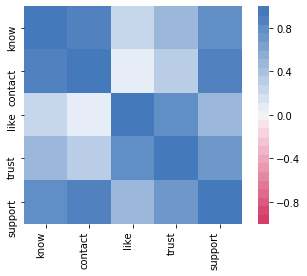

In [33]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Correlation Among Raw Data

### How well do you know this person?

In [34]:
data_2019_know_corr = data_2019_know.corr()
data_2019_know_corr

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,1.000000,-0.080582,0.166667,0.201100,0.127688,0.149241,0.311086,0.681187,0.530173,0.484123,0.762770,0.866025,0.907288,-0.301511
Emma,-0.080582,1.000000,-0.162611,-0.175412,0.242681,0.494975,-0.102632,0.319468,-0.047565,-0.139272,0.058714,-0.288675,0.031846,0.250000
Gabby,0.166667,-0.162611,1.000000,0.536088,0.301511,-0.016855,-0.106600,0.479794,0.000000,0.000000,-0.264135,-0.246183,0.101745,-0.136931
Cam,0.201100,-0.175412,0.536088,1.000000,0.306583,0.397573,0.016129,0.410391,0.385872,0.034586,0.300763,-0.068599,0.190519,-0.128624
Andrew,0.127688,0.242681,0.301511,0.306583,1.000000,0.851216,-0.324760,0.095050,0.717137,0.733148,0.188707,-0.262950,-0.049233,0.717137
Isaac,0.149241,0.494975,-0.016855,0.397573,0.851216,1.000000,0.000000,0.163846,0.559017,0.496139,0.330847,-0.153897,0.000000,0.711512
Alex,0.311086,-0.102632,-0.106600,0.016129,-0.324760,0.000000,1.000000,0.376867,-0.107807,-0.244414,0.401610,0.207390,0.150409,-0.297044
Arielle,0.681187,0.319468,0.479794,0.410391,0.095050,0.163846,0.376867,1.000000,0.102426,0.057540,0.510328,0.371159,0.628971,-0.223721
Liam,0.530173,-0.047565,0.000000,0.385872,0.717137,0.559017,-0.107807,0.102426,1.000000,0.854598,0.571870,0.300000,0.446968,0.583001
James,0.484123,-0.139272,0.000000,0.034586,0.733148,0.496139,-0.244414,0.057540,0.854598,1.000000,0.431967,0.397026,0.396375,0.582999


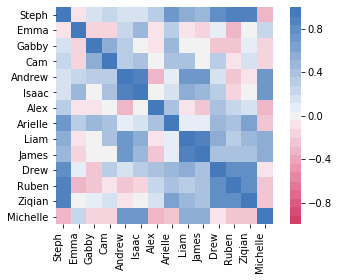

In [35]:
ax = sns.heatmap(
    data_2019_know_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you like this person?

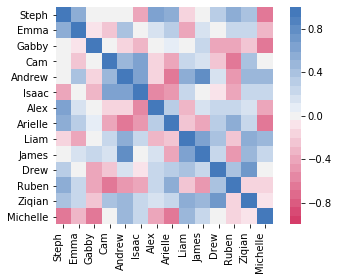

In [36]:
data_2019_like_corr = data_2019_like.corr()
data_2019_like_corr

ax = sns.heatmap(
    data_2019_like_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

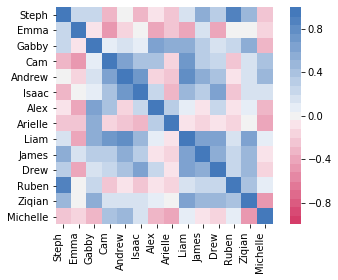

In [37]:
data_2019_contact_corr = data_2019_contact.corr()
data_2019_contact_corr

ax = sns.heatmap(
    data_2019_contact_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you trust this person?

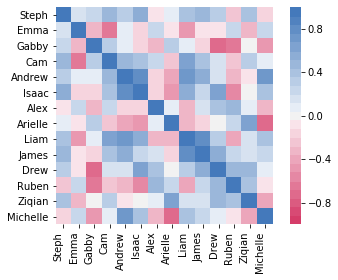

In [38]:
data_2019_trust_corr = data_2019_trust.corr()
data_2019_trust_corr

ax = sns.heatmap(
    data_2019_trust_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How likely are you to go to this person for advice or emotional support?

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


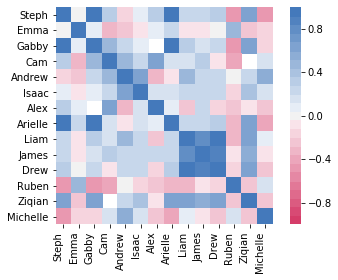

In [39]:
data_2019_support_corr = data_2019_support.corr()
data_2019_support_corr

ax = sns.heatmap(
    data_2019_support_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);